# Titanic Data Analysis and Visualization

## 1. Data Preparation
- Load into `pandas.DataFrame`
- Concatenate datasets using `PassengerId` as the key
- Ensure missing data appears as `NaN`, and convert certain columns to categorical types


In [102]:
import pandas as pd

def load_and_concat_data(train_path, test_path):
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    train["dataset_type"] = "train"
    test["dataset_type"] = "test"
    return pd.concat([train, test], ignore_index=True)

def preprocess_data(data):
    data["Survived"] = data["Survived"].astype("category")
    data["Pclass"] = data["Pclass"].astype("category")
    data["Sex"] = data["Sex"].astype("category")
    data["FamilySize"] = pd.to_numeric(data["FamilySize"], errors="coerce")
    data["CabinBool"] = data["Cabin"].notnull().astype(int)
    return data

# Load and preprocess data
data = load_and_concat_data("train.csv", "test.csv")
data = preprocess_data(data)


KeyError: 'FamilySize'

## 2. Table Analysis
### Basic Table Statistics
- Which class had the most passengers?


In [103]:
# Count passengers in each class
class_counts = data["Pclass"].value_counts()
print(class_counts)


Pclass
3    709
1    323
2    277
Name: count, dtype: int64


### Grouping by Class and Gender for Age Analysis
- Calculate the average age by class and gender
- Identify the youngest and oldest groups, and calculate the age difference


In [104]:
# Group by Pclass and Sex to calculate average age
grouped_age = data.groupby(["Pclass", "Sex"])["Age"].mean()
youngest_group = grouped_age.idxmin()
oldest_group = grouped_age.idxmax()
age_difference = grouped_age.max() - grouped_age.min()

print(f"Youngest group: {youngest_group}")
print(f"Oldest group: {oldest_group}")
print(f"Age difference: {age_difference}")


Youngest group: (np.int64(3), 'female')
Oldest group: (np.int64(1), 'male')
Age difference: 18.843942575810384


C:\Users\Salman A\AppData\Local\Temp\ipykernel_21440\2272764610.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Filtering and Sorting by Last Name (Survivors with Last Name Starting with 'K')
- Filter for survivors whose last names start with "K"
- Sort by fare in descending order to see who paid the most and least


In [105]:
data["LastName"] = data["Name"].apply(lambda name: name.split(",")[0].strip())
k_survivors = data[(data["Survived"] == 1) & (data["LastName"].str.startswith("K"))]
k_survivors_sorted = k_survivors[["Name", "Fare"]].sort_values(by="Fare", ascending=False)
k_survivors_sorted


,Name,Fare
621,"Kimball, Mr. Edwin Nelson Jr",52.5542
457,"Kenyon, Mrs. Frederick R (Marion)",51.8625
316,"Kantor, Mrs. Sinai (Miriam Sternin)",26.0000
184,"Kink-Heilmann, Miss. Luise Gretchen",22.0250
706,"Kelly, Mrs. Florence ""Fannie""",13.5000
691,"Karun, Miss. Manca",13.4167
303,"Keane, Miss. Nora A",12.3500
300,"Kelly, Miss. Anna Katherine ""Annie Kate""",7.7500
573,"Kelly, Miss. Mary",7.7500


### Maximum Number of Relatives for a Survivor


In [106]:
data["Relatives"] = data["SibSp"] + data["Parch"]
max_relatives = data[data["Survived"] == 1]["Relatives"].max()
print("Max relatives with a survivor:", max_relatives)


Max relatives with a survivor: 6


### Comparing Average Fare by Cabin Availability
- Calculate the average fare for passengers with and without cabin information and their ratio


In [107]:
with_cabin_fare = data[data["Cabin"].notnull()]["Fare"].mean()
without_cabin_fare = data[data["Cabin"].isnull()]["Fare"].mean()
fare_ratio = with_cabin_fare / without_cabin_fare

print(f"Average fare (with cabin): {with_cabin_fare}")
print(f"Average fare (without cabin): {without_cabin_fare}")
print(f"Fare ratio: {fare_ratio}")


Average fare (with cabin): 81.92899830508475
Average fare (without cabin): 19.132707206317864
Fare ratio: 4.282143526350037


## 3. Visualization
### Histogram: Age Distribution


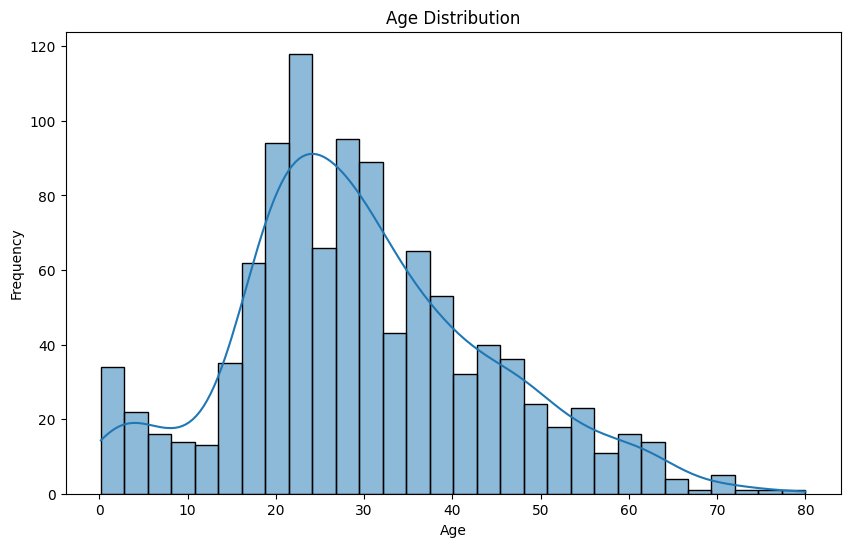

In [108]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(10, 6))
sns.histplot(data["Age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


### Interactive Line Plot (Plotly): Survival Rate by Family Size

### Interactive Histogram (Plotly): Fare Distribution


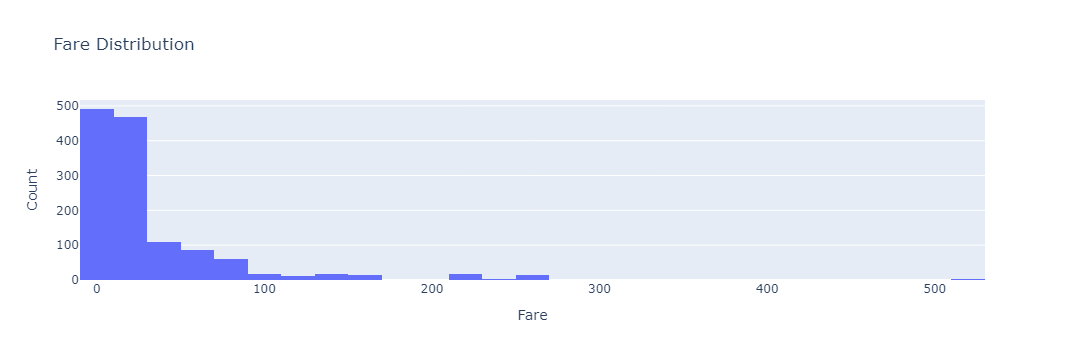

In [109]:
fig = px.histogram(data, x="Fare", nbins=50, title="Fare Distribution")
fig.update_layout(xaxis_title="Fare", yaxis_title="Count")
fig.show()

### Bar Chart: Survival Count by Embarked Port


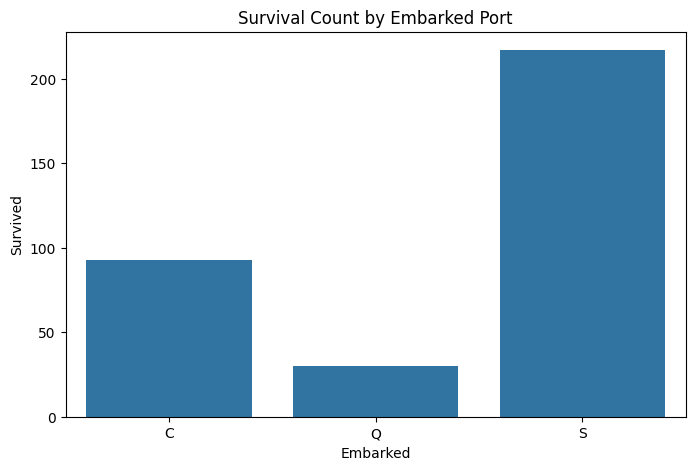

In [110]:
# Fill NaN values with 0 before converting to integer
data["Survived"] = data["Survived"].fillna(0).astype(int)

# Group by 'Embarked' and sum the 'Survived' column
survived_by_embarked = data.groupby("Embarked")["Survived"].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=survived_by_embarked, x="Embarked", y="Survived")
plt.title("Survival Count by Embarked Port")
plt.show()


### Horizontal Bar Chart: Average Fare by Passenger Class


C:\Users\Salman A\AppData\Local\Temp\ipykernel_21440\2465288872.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



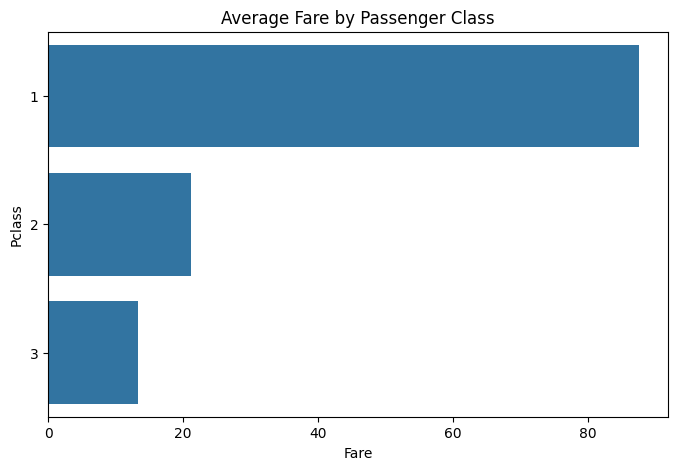

In [111]:
avg_fare_by_class = data.groupby("Pclass")["Fare"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_fare_by_class, x="Fare", y="Pclass", orient="h")
plt.title("Average Fare by Passenger Class")
plt.show()

### Pie Chart: Survival Rate

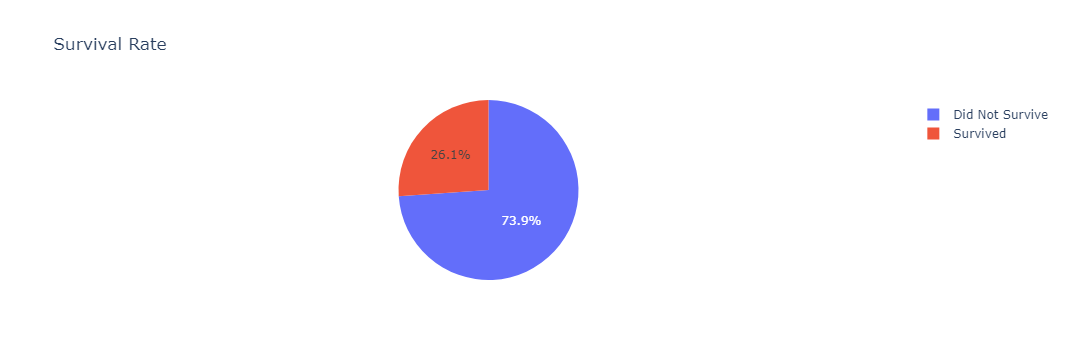

In [112]:
survival_counts = data["Survived"].value_counts()
fig = px.pie(values=survival_counts, names=["Did Not Survive", "Survived"], title="Survival Rate")
fig.show()

###  Box Plot: Fare by Class and Survival Status


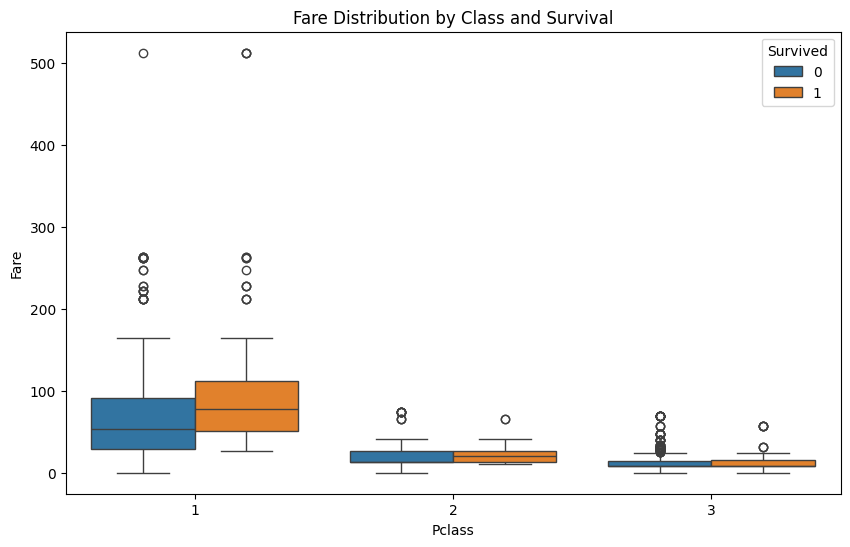

In [113]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Pclass", y="Fare", hue="Survived")
plt.title("Fare Distribution by Class and Survival")
plt.show()

### Scatter Plot: Age vs Fare, color by Survival

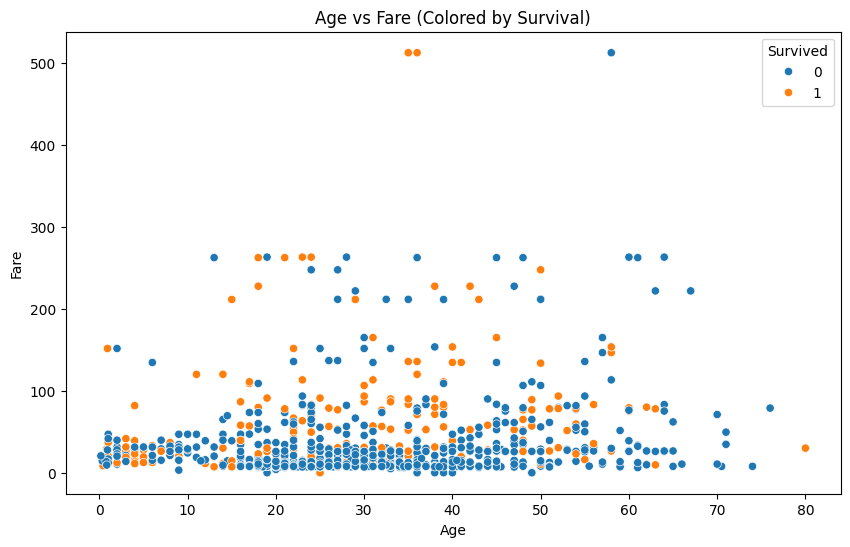

In [114]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Age", y="Fare", hue="Survived")
plt.title("Age vs Fare (Colored by Survival)")
plt.show()

### Line Plot (Multiple Lines): Average Age by Class and Gender

C:\Users\Salman A\AppData\Local\Temp\ipykernel_21440\3314998075.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



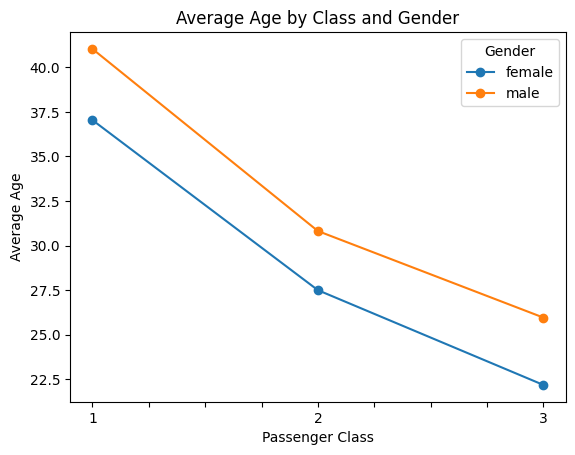

In [115]:
age_by_class_gender = data.groupby(["Pclass", "Sex"])["Age"].mean().unstack()
age_by_class_gender.plot(kind="line", marker="o")
plt.title("Average Age by Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Average Age")
plt.legend(title="Gender")
plt.show()

### 3D Scatter Plot: Age, Fare, and Family Size


In [116]:
fig = px.scatter_3d(data, x="Age", y="Fare", z="FamilySize", color="Survived",
                    title="3D Scatter Plot of Age, Fare, and Family Size")
fig.show()



ValueError: Value of 'z' is not the name of a column in 'data_frame'. Expected one of ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'dataset_type', 'LastName', 'Relatives'] but received: FamilySize

### Sunburst Chart: Class, Gender, and Survival


C:\Users\Salman A\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Salman A\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Salman A\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future def

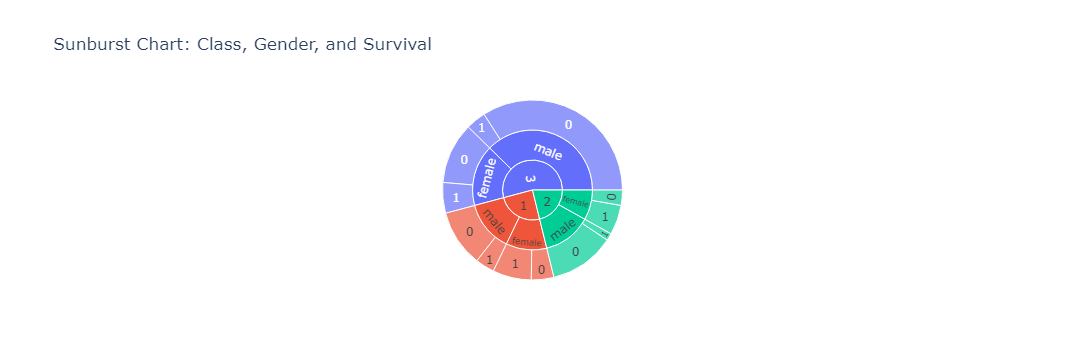

In [117]:
fig = px.sunburst(data, path=["Pclass", "Sex", "Survived"], title="Sunburst Chart: Class, Gender, and Survival")
fig.show()


### (Bonus) Sankey Diagram: Class, Gender, and Survival


C:\Users\Salman A\AppData\Local\Temp\ipykernel_21440\103577060.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



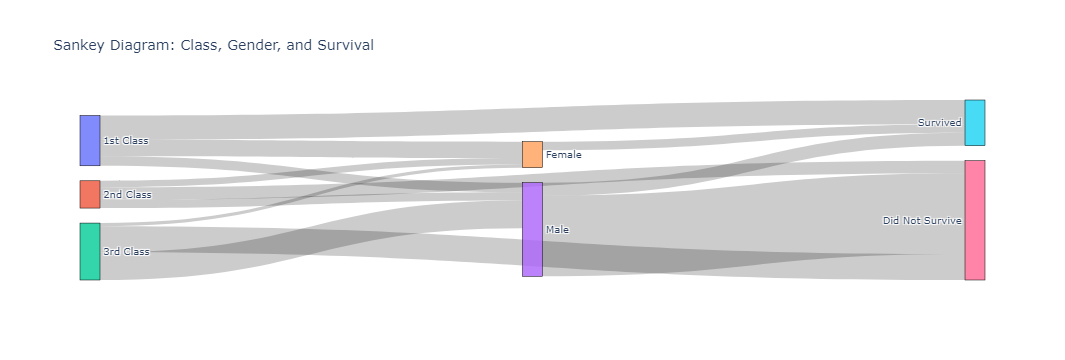

In [100]:
sankey_data = (
    data.groupby(["Pclass", "Sex", "Survived"]).size().reset_index(name="count")
)
fig = go.Figure(
    data=[
        go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=[
                    "1st Class",
                    "2nd Class",
                    "3rd Class",
                    "Male",
                    "Female",
                    "Survived",
                    "Did Not Survive",
                ],
            ),
            link=dict(
                source=[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4],
                target=[3, 4, 5, 3, 4, 6, 3, 4, 6, 5, 6, 5, 6],
                value=sankey_data["count"],
            ),
        )
    ]
)
fig.update_layout(
    title_text="Sankey Diagram: Class, Gender, and Survival", font_size=10
)
fig.show()
